In [44]:
# plot density convergence
import MDAnalysis as mda
from MDAnalysis.analysis import align
import os

import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from tqdm import tqdm

fontsize = 30
plt.rc('font', size=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('axes', labelsize=fontsize) 
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rcParams["font.family"] = "TeX Gyre Heros"



In [45]:
path = '/mnt/sdb/xlf/Desktop/ion_channels/TRPV6/oriSystem/150mMCa_trjs'


os.chdir(path)

top_dire = 'md1_ion_prot.gro'
trj_dire = 'md3_ion_prot.xtc'

trj_dires = ['md'+str(x)+'_ion_prot.xtc' for x in range(1,4)]

u = mda.Universe(top_dire,trj_dires)
u.transfer_to_memory(verbose=True) 

Nt = len(u.trajectory)  # number of frames
t_total = u.trajectory[-1].time/1000.0 # unit: ns
t_frame = u.trajectory[1].time/1000.0 
t_plot = np.arange(Nt)*t_frame
print('t_frame = '+str(t_frame)+' ns, t_total = '+str(t_total)+' ns')

Loading frames:   0%|          | 0/37503 [00:00<?, ?it/s]

t_frame = 0.04 ns, t_total = 1500.08 ns


In [46]:
# calculate the trajectory of ions -- two ions
ionName = 'D0'
mgs = u.select_atoms('name '+ionName)
pos_mgs = u.trajectory.timeseries(asel=mgs)

protein COM:  [53.67948917 52.5640171  55.13542292]


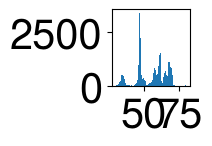

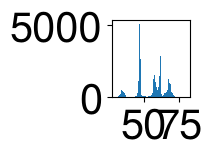

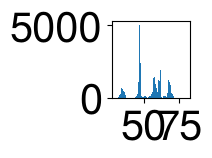

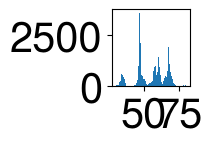

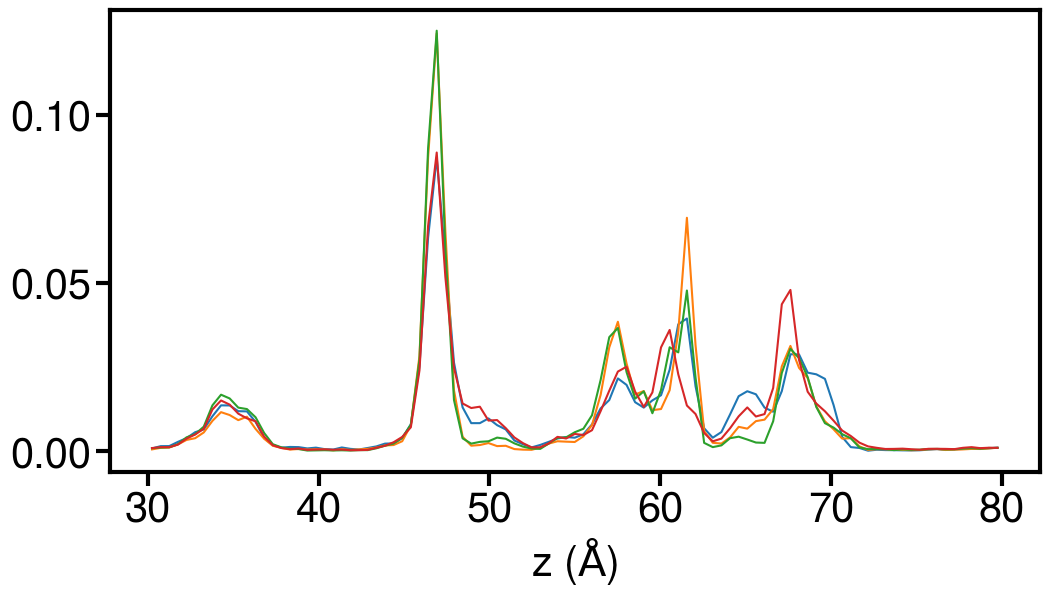

In [47]:
# show box size
boxSizes = np.zeros((Nt,3))
for t in range(Nt):
    u.trajectory[t]
    boxSizes[t,:] = u.dimensions[0:3]
boxSizeZ = boxSizes[:,2]



# select ions around SF
u.trajectory[0]
prot = u.select_atoms("protein")
print("protein COM: ", prot.center_of_mass())
center_pos = prot.center_of_mass()[:3]

# calculate density distribution along z

# distribution of z values
# center: ?, radius 3 A
r_cut = 3
repIds = np.arange(1,4)
nFrames = int(Nt / len(repIds))

tStartVals = np.arange(0,nFrames-5000,2500)
tEndVals = np.arange(5000,nFrames,2500)
zValsAll = [[] for _ in range(len(tStartVals))]
for bin_i in range(len(tStartVals)):
    zvals_i = []
    for rep_i in range(len(repIds)):
        tAdd = nFrames*rep_i
        t_range = np.arange(tStartVals[bin_i]+tAdd,tEndVals[bin_i]+tAdd)
        for i in range(len(mgs)):
            data = pos_mgs
            xArr = data[i,t_range,0].copy() / boxSizes[t_range,0] * boxSizes[0,0]
            yArr = data[i,t_range,1].copy() / boxSizes[t_range,1] * boxSizes[0,1]
            arr = data[i,t_range,2].copy() / boxSizes[t_range,2] * boxSizes[0,2]
            rArr = ((xArr-center_pos[0])**2+(yArr-center_pos[1])**2)**0.5
            inds = np.where((arr>25) & (arr<80) & (rArr<r_cut))[0]
            zvals_i.extend(list(arr[inds]))
    zValsAll[bin_i] = zvals_i

# plot 
histx = []
histy = []
for bin_i in range(len(tStartVals)):
    fig, axes = plt.subplots(1,1, figsize=(1,1))
    a = plt.hist(zValsAll[bin_i],bins = list(np.linspace(30,80,100)))
    histx.append((a[1][1:]+a[1][:-1])/2)
    histy.append(a[0]/sum(a[0]))

fig, axes = plt.subplots(1,1, figsize=(12,6))
for histi in range(len(tStartVals)):
    plt.plot(histx[histi],histy[histi])
#plt.legend(["Ca","Na"])
# plt.title(r"z distribution of ions in pore (r < 3 $\rm \AA$)")
plt.xlabel(r'z ($\rm \AA$)')
# plt.legend(["{:.0f}-{:.0f} ns".format(tStartVals[i]*t_frame,tEndVals[i]*t_frame) for i in range(len(tStartVals))])
"""
plt.vlines(60,0,9000,color = "red", linestyle="dashed")
plt.vlines(63,0,9000,color = "red", linestyle="dashed")
plt.vlines(67,0,9000,color = "red", linestyle="dashed")

"""

ax = plt.gca()
width = 3
ax.spines["top"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.spines["bottom"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
plt.tick_params(width=3,length = 10)


Loading frames:   0%|          | 0/37503 [00:00<?, ?it/s]

t_frame = 0.04 ns, t_total = 1500.08 ns
protein COM:  [55.63131633 55.68348196 47.20613015]


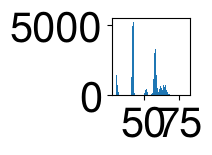

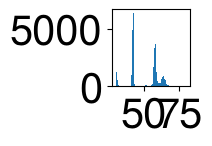

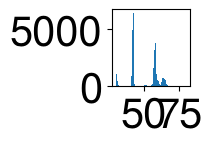

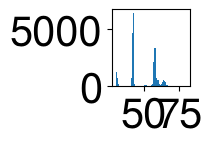

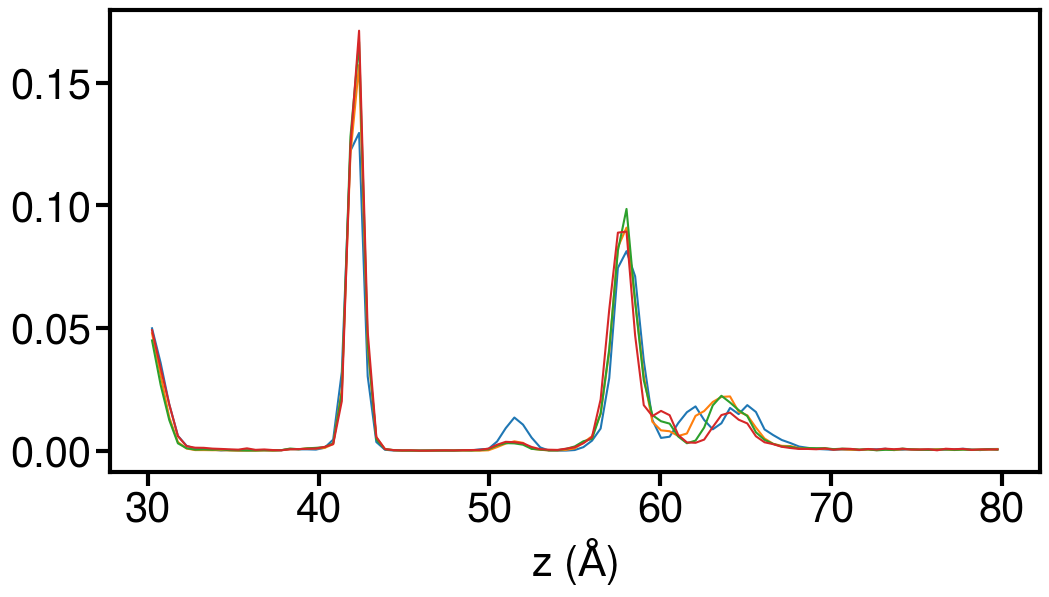

In [48]:
path = '/mnt/sdb/xlf/Desktop/ion_channels/TRPV1/oriSystem/150mMCa_trjs'


os.chdir(path)

top_dire = 'md1_prot_ion.gro'
trj_dire = 'md3_prot_ion.xtc'

trj_dires = ['md'+str(x)+'_prot_ion.xtc' for x in range(1,4)]

u = mda.Universe(top_dire,trj_dires)
u.transfer_to_memory(verbose=True) 

Nt = len(u.trajectory)  # number of frames
t_total = u.trajectory[-1].time/1000.0 # unit: ns
t_frame = u.trajectory[1].time/1000.0 
t_plot = np.arange(Nt)*t_frame
print('t_frame = '+str(t_frame)+' ns, t_total = '+str(t_total)+' ns')

# calculate the trajectory of ions -- two ions
ionName = 'D0'
mgs = u.select_atoms('name '+ionName)
pos_mgs = u.trajectory.timeseries(asel=mgs)


# show box size
boxSizes = np.zeros((Nt,3))
for t in range(Nt):
    u.trajectory[t]
    boxSizes[t,:] = u.dimensions[0:3]
boxSizeZ = boxSizes[:,2]



# select ions around SF
u.trajectory[0]
prot = u.select_atoms("protein")
print("protein COM: ", prot.center_of_mass())
center_pos = prot.center_of_mass()[:3]

# calculate density distribution along z

# distribution of z values
# center: ?, radius 3 A
r_cut = 3
repIds = np.arange(1,4)
nFrames = int(Nt / len(repIds))

tStartVals = np.arange(0,nFrames-5000,2500)
tEndVals = np.arange(5000,nFrames,2500)
zValsAll = [[] for _ in range(len(tStartVals))]
for bin_i in range(len(tStartVals)):
    zvals_i = []
    for rep_i in range(len(repIds)):
        tAdd = nFrames*rep_i
        t_range = np.arange(tStartVals[bin_i]+tAdd,tEndVals[bin_i]+tAdd)
        for i in range(len(mgs)):
            data = pos_mgs
            xArr = data[i,t_range,0].copy() / boxSizes[t_range,0] * boxSizes[0,0]
            yArr = data[i,t_range,1].copy() / boxSizes[t_range,1] * boxSizes[0,1]
            arr = data[i,t_range,2].copy() / boxSizes[t_range,2] * boxSizes[0,2]
            rArr = ((xArr-center_pos[0])**2+(yArr-center_pos[1])**2)**0.5
            inds = np.where((arr>25) & (arr<80) & (rArr<r_cut))[0]
            zvals_i.extend(list(arr[inds]))
    zValsAll[bin_i] = zvals_i

# plot 
histx = []
histy = []
for bin_i in range(len(tStartVals)):
    fig, axes = plt.subplots(1,1, figsize=(1,1))
    a = plt.hist(zValsAll[bin_i],bins = list(np.linspace(30,80,100)))
    histx.append((a[1][1:]+a[1][:-1])/2)
    histy.append(a[0]/sum(a[0]))

fig, axes = plt.subplots(1,1, figsize=(12,6))
for histi in range(len(tStartVals)):
    plt.plot(histx[histi],histy[histi])
#plt.legend(["Ca","Na"])
# plt.title(r"z distribution of ions in pore (r < 3 $\rm \AA$)")
plt.xlabel(r'z ($\rm \AA$)')
# plt.legend(["{:.0f}-{:.0f} ns".format(tStartVals[i]*t_frame,tEndVals[i]*t_frame) for i in range(len(tStartVals))])


ax = plt.gca()
width = 3
ax.spines["top"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.spines["bottom"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
plt.tick_params(width=3,length = 10)


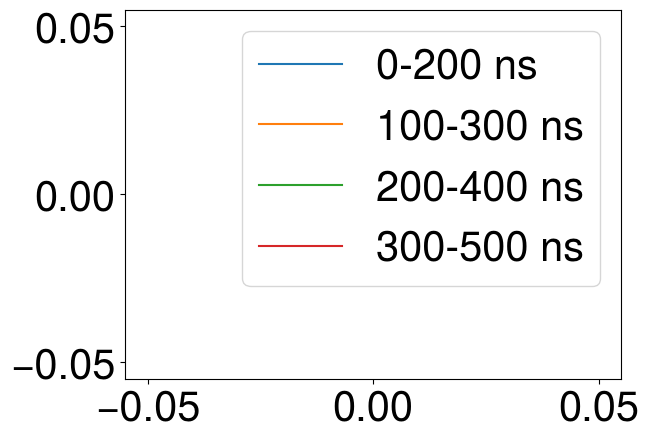

In [49]:
for i in range(4):
    plt.plot(0,0)
plt.legend(["{:.0f}-{:.0f} ns".format(tStartVals[i]*t_frame,tEndVals[i]*t_frame) for i in range(len(tStartVals))])
